In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('breast/breast.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
array = np.array(['radius_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'texture_worst'])

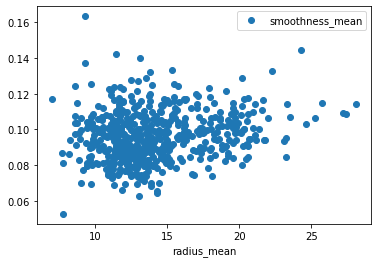

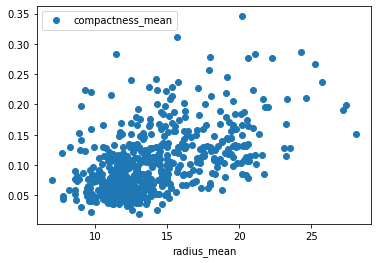

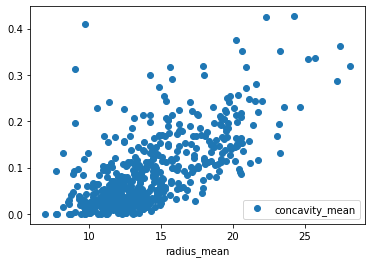

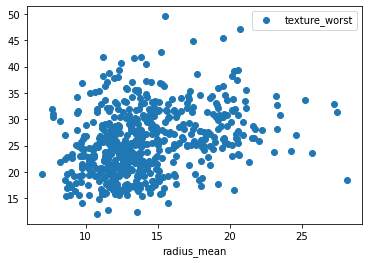

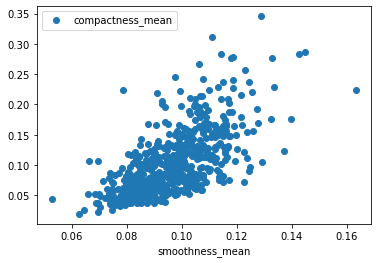

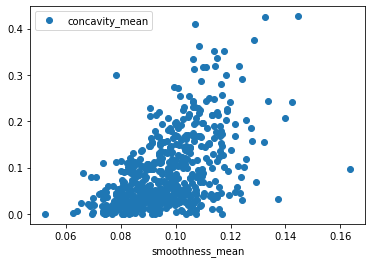

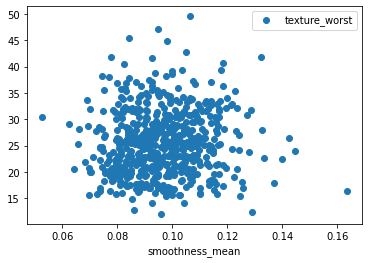

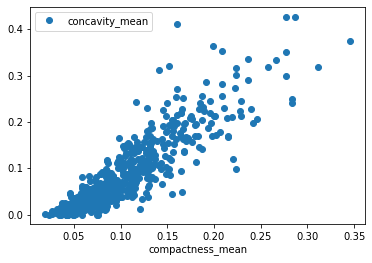

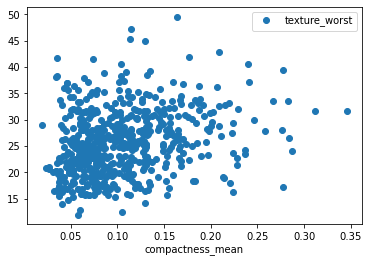

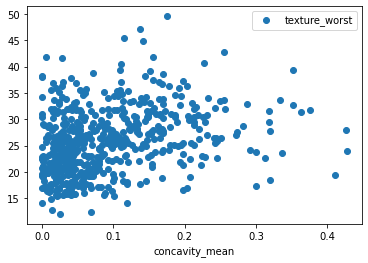

In [4]:
for i in range(0, len(array)-1):
    for j in range(i+1, len(array)):
        dataset.plot(x=array[i], y=array[j], style='o')


In [236]:
processed_data = dataset[array]
processed_data

,radius_mean,smoothness_mean,compactness_mean,concavity_mean,texture_worst
0,17.99,0.11840,0.27760,0.30010,17.33
1,20.57,0.08474,0.07864,0.08690,23.41
2,19.69,0.10960,0.15990,0.19740,25.53
3,11.42,0.14250,0.28390,0.24140,26.50
4,20.29,0.10030,0.13280,0.19800,16.67
...,...,...,...,...,...
564,21.56,0.11100,0.11590,0.24390,26.40
565,20.13,0.09780,0.10340,0.14400,38.25
566,16.60,0.08455,0.10230,0.09251,34.12
567,20.60,0.11780,0.27700,0.35140,39.42


In [237]:
features = processed_data.iloc[:, :-1]
target_values = processed_data.iloc[:, -1]

features

,radius_mean,smoothness_mean,compactness_mean,concavity_mean
0,17.99,0.11840,0.27760,0.30010
1,20.57,0.08474,0.07864,0.08690
2,19.69,0.10960,0.15990,0.19740
3,11.42,0.14250,0.28390,0.24140
4,20.29,0.10030,0.13280,0.19800
...,...,...,...,...
564,21.56,0.11100,0.11590,0.24390
565,20.13,0.09780,0.10340,0.14400
566,16.60,0.08455,0.10230,0.09251
567,20.60,0.11780,0.27700,0.35140


In [238]:
splitdata = np.split(features, [455])
train_features = splitdata[0]
test_features = splitdata[1]



splitdata = np.split(target_values, [455])
train_target = splitdata[0]
test_target = splitdata[1]

In [239]:
# REPLACE_COUNT = trainset.size*0.1               # Set the number of missing values
# NAN = 0

# missing_data_train = trainset.to_numpy()
# full_data_train = missing_data_train.copy()     # Create a copy of the same trainset

# missing_data_train.flat[np.random.choice(missing_data_train.size, int(REPLACE_COUNT), replace=False)] = NAN

# missing_data_test = testset.to_numpy()
# full_data_test = missing_data_test.copy()

# missing_data_test.flat[np.random.choice(missing_data_test.size, int(REPLACE_COUNT*0.2), replace=False)] = NAN

# np.set_printoptions(precision=2, suppress=True)

# print(missing_data_train)

In [328]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.enc1 = nn.Linear(in_features=4, out_features=3)
        self.enc2 = nn.Linear(in_features=3, out_features=2)
        self.enc3 = nn.Linear(in_features=2, out_features=1)

        self.dec1 = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        x = F.leaky_relu(self.enc1(x))
        x = F.leaky_relu(self.enc2(x))
        x = F.leaky_relu(self.enc3(x))
        x = self.dec1(x)
        return x

In [329]:
net = Autoencoder().double()
print(net)

Autoencoder(
  (enc1): Linear(in_features=4, out_features=3, bias=True)
  (enc2): Linear(in_features=3, out_features=2, bias=True)
  (enc3): Linear(in_features=2, out_features=1, bias=True)
  (dec1): Linear(in_features=1, out_features=1, bias=True)
)


In [330]:
NUM_EPOCHS = 8000
LEARNING_RATE = 0.0001
NUM_FEATURES = 4
BATCH_SIZE = 455
BATCH_SIZE_TEST = 114

In [331]:
x_train = torch.from_numpy(train_features.to_numpy())
x_train = x_train.view(1, BATCH_SIZE, NUM_FEATURES)

x_test = torch.from_numpy(test_features.to_numpy())
x_test = x_test.view(1, BATCH_SIZE_TEST, NUM_FEATURES)

y_train = torch.from_numpy(train_target.to_numpy())
y_train = y_train.view(1, BATCH_SIZE, 1)

y_test = torch.from_numpy(test_target.to_numpy())
y_test = y_test.view(1, BATCH_SIZE_TEST, 1)

x_train.shape

torch.Size([1, 455, 4])

In [332]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)

In [333]:
def train(net):
    train_loss = []
    torch.set_printoptions(precision=3, sci_mode=False)
    for epoch in range(NUM_EPOCHS):
        running_loss = 0.0
        for features, target in zip(x_train, y_train):
            optimizer.zero_grad()
            outputs = net(features.double())
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            if epoch == NUM_EPOCHS-1:
                for i in range(len(features)):
                    print("Input: ", features[i])
                    print("Target: ", target[i])
                    print("Outputs: ", outputs[i])

        loss = running_loss / len(x_train)
        train_loss.append(loss)

        print('Epoch {} of {}, Train Loss: {:.3f}'
            .format(epoch+1, NUM_EPOCHS, loss))

    return train_loss


def test(net):

    net.eval()

    with torch.no_grad():
        test_loss = []
        running_loss = 0.0

        for features, target in zip(x_test, y_test):
            outputs = net(features.double())
            loss = criterion(outputs, target)
            running_loss += loss.item()
            for i in range(len(features)):
                    print("Input: ", features[i])
                    print("Target: ", target[i])
                    print("Outputs: ", outputs[i])

        loss = running_loss / len(x_test)
        test_loss.append(loss)
        print('Test Loss: {:.3f}'.format(loss))

        return test_loss

In [334]:
results = train(net)

h.float64, grad_fn=<SelectBackward>)
Input:  tensor([15.750,  0.124,  0.236,  0.291], dtype=torch.float64)
Target:  tensor([24.170], dtype=torch.float64)
Outputs:  tensor([26.452], dtype=torch.float64, grad_fn=<SelectBackward>)
Input:  tensor([25.730,  0.115,  0.236,  0.337], dtype=torch.float64)
Target:  tensor([23.580], dtype=torch.float64)
Outputs:  tensor([40.772], dtype=torch.float64, grad_fn=<SelectBackward>)
Input:  tensor([15.080,  0.102,  0.098,  0.123], dtype=torch.float64)
Target:  tensor([33.220], dtype=torch.float64)
Outputs:  tensor([25.119], dtype=torch.float64, grad_fn=<SelectBackward>)
Input:  tensor([11.140,  0.073,  0.061,  0.045], dtype=torch.float64)
Target:  tensor([15.820], dtype=torch.float64)
Outputs:  tensor([19.301], dtype=torch.float64, grad_fn=<SelectBackward>)
Input:  tensor([12.560,  0.088,  0.104,  0.103], dtype=torch.float64)
Target:  tensor([22.430], dtype=torch.float64)
Outputs:  tensor([21.468], dtype=torch.float64, grad_fn=<SelectBackward>)
Input:  

In [284]:
test_result = test(net)

Input:  tensor([13.380,  0.092,  0.074,  0.028], dtype=torch.float64)
Target:  tensor([41.610], dtype=torch.float64)
Outputs:  tensor([24.135], dtype=torch.float64)
Input:  tensor([11.630,  0.094,  0.086,  0.072], dtype=torch.float64)
Target:  tensor([38.810], dtype=torch.float64)
Outputs:  tensor([22.318], dtype=torch.float64)
Input:  tensor([13.210,  0.088,  0.052,  0.028], dtype=torch.float64)
Target:  tensor([34.230], dtype=torch.float64)
Outputs:  tensor([23.905], dtype=torch.float64)
Input:  tensor([   13.000,     0.084,     0.051,     0.012], dtype=torch.float64)
Target:  tensor([31.880], dtype=torch.float64)
Outputs:  tensor([23.671], dtype=torch.float64)
Input:  tensor([9.755, 0.080, 0.046, 0.015], dtype=torch.float64)
Target:  tensor([36.920], dtype=torch.float64)
Outputs:  tensor([20.237], dtype=torch.float64)
Input:  tensor([17.080,  0.099,  0.111,  0.101], dtype=torch.float64)
Target:  tensor([34.490], dtype=torch.float64)
Outputs:  tensor([28.119], dtype=torch.float64)
In

In [276]:
torch.save(net, './breast_autoencoder')

In [268]:
dataset = pd.read_csv('breast/breast.csv')
array = np.array(['radius_mean', 'smoothness_mean', 'compactness_mean',
                    'concavity_mean', 'texture_worst'])
processed_data = dataset[array]
processed_data.shape

(569, 5)

In [269]:
features = processed_data.iloc[:, :-1]
target_values = processed_data.iloc[:, -1]

features

,radius_mean,smoothness_mean,compactness_mean,concavity_mean
0,17.99,0.11840,0.27760,0.30010
1,20.57,0.08474,0.07864,0.08690
2,19.69,0.10960,0.15990,0.19740
3,11.42,0.14250,0.28390,0.24140
4,20.29,0.10030,0.13280,0.19800
...,...,...,...,...
564,21.56,0.11100,0.11590,0.24390
565,20.13,0.09780,0.10340,0.14400
566,16.60,0.08455,0.10230,0.09251
567,20.60,0.11780,0.27700,0.35140


In [270]:
input_tensor = torch.from_numpy(features.to_numpy())

In [271]:
my_model = torch.load('breast_autoencoder')
my_model

Autoencoder(
  (enc1): Linear(in_features=4, out_features=2, bias=True)
  (enc2): Linear(in_features=2, out_features=1, bias=True)
  (dec1): Linear(in_features=1, out_features=1, bias=True)
)

In [272]:
new_column = my_model(input_tensor.double())
torch.set_printoptions(precision=4, sci_mode=False)
new_column

tensor([[28.8043],
        [30.5787],
        [30.0306],
        [23.2498],
        [30.5020],
        [23.9256],
        [28.6841],
        [24.9195],
        [24.4339],
        [24.0492],
        [26.6868],
        [26.6139],
        [29.6697],
        [26.6327],
        [25.0918],
        [25.6680],
        [25.6133],
        [27.0577],
        [30.0254],
        [24.6548],
        [24.3022],
        [21.2128],
        [26.4233],
        [31.1262],
        [27.4212],
        [27.9765],
        [25.7014],
        [29.0153],
        [26.3161],
        [28.1097],
        [29.1907],
        [23.3480],
        [27.8186],
        [29.6466],
        [26.9706],
        [27.4553],
        [25.3349],
        [24.1419],
        [25.8084],
        [24.6829],
        [24.5053],
        [22.5668],
        [29.5573],
        [24.5273],
        [24.3779],
        [29.1631],
        [20.0785],
        [24.4468],
        [23.4132],
        [24.5826],
        [23.0725],
        [24.6590],
        [23.

In [273]:
new_dataset = np.concatenate((features, new_column.detach().numpy()), axis=1)
np.set_printoptions(precision=2, suppress=True)
new_dataset

array([[17.99,  0.12,  0.28,  0.3 , 28.8 ],
       [20.57,  0.08,  0.08,  0.09, 30.58],
       [19.69,  0.11,  0.16,  0.2 , 30.03],
       ...,
       [16.6 ,  0.08,  0.1 ,  0.09, 27.26],
       [20.6 ,  0.12,  0.28,  0.35, 31.04],
       [ 7.76,  0.05,  0.04,  0.  , 19.65]])

In [274]:
np.savetxt('new_breast.csv', new_dataset)

In [42]:
np.savetxt('test.csv', features)